-[Cross validation using grid search](https://www.kaggle.com/code/muhammetvarl/keras-multiclass-classification-cross-validation)

-[resnet50Docs](https://www.tensorflow.org/api_docs/python/tf/keras/applications/ResNet50)

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
import scipy.signal
import keras
import ipywidgets as widgets
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scikeras.wrappers import KerasClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


(89400, 5)
(89400, 16, 16, 3)
(595, 5)
(595, 16, 16, 3)
[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 2

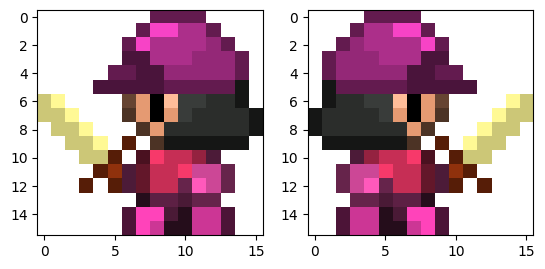

In [37]:
data = np.load('./Dataset1/sprites_labels.npy')
sprites = np.load('./Dataset1/sprites.npy')

print(data.shape)
print(sprites.shape)

selected_data = data[:894]
selected_data = np.delete(selected_data, slice(244, 543), axis=0) #deletes duplicates
print(selected_data.shape)

selected_sprites = sprites[:894]
selected_sprites = np.delete(selected_sprites, slice(244, 543), axis=0) #deletes duplicates
print(selected_sprites.shape)

data_with_mirrored = np.concatenate((selected_data, selected_data), axis=0)

mirrored_sprites = np.flip(selected_sprites, axis=2)
sprites_with_mirrored = np.concatenate((selected_sprites, mirrored_sprites), axis=0)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(selected_sprites[1])
ax[1].imshow(mirrored_sprites[1]);

print(sprites_with_mirrored)


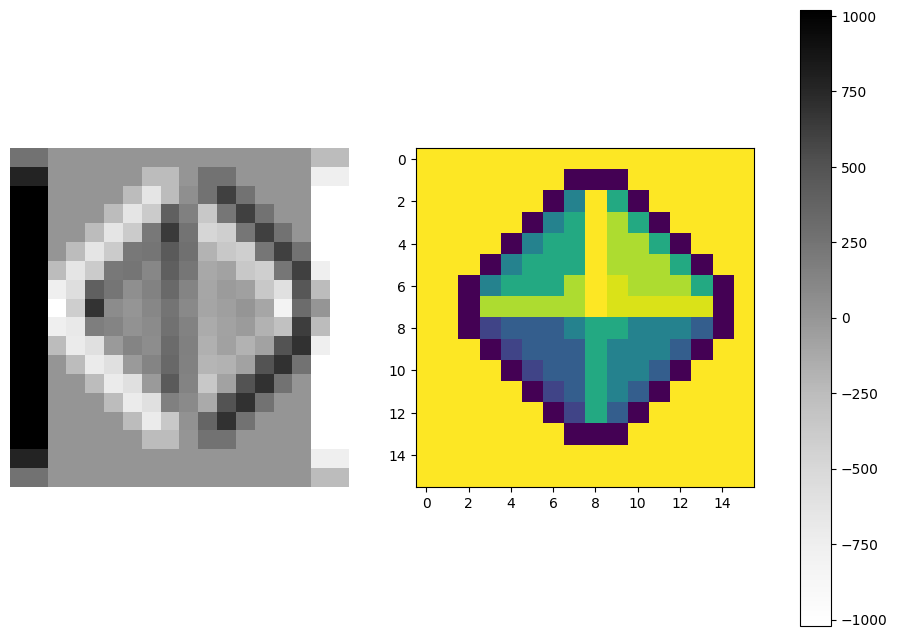

In [38]:
X_train, X_test, y_train, y_test = train_test_split(sprites_with_mirrored, data_with_mirrored)

y_train_one_hot = tf.keras.utils.to_categorical(y_train, 5)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, 5)



fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


conv_result = scipy.signal.convolve2d(X_train[400, :, :, :1].reshape(16, 16), np.array([[1,2,1],[0,0,0],[-1,-2,-1]]).T)
im = ax.imshow(conv_result, cmap='Greys')
ax2.imshow(X_train[400, :, :, :1])
ax.axis('off')
fig.colorbar(im, ax=[ax, ax2]);



In [39]:


'''
conv_network = tf.keras.Sequential()

conv_network.add(tf.keras.layers.Conv2D(49, (3, 3), strides=(2,2), activation='relu', input_shape=(16,16,1)))
conv_network.add(tf.keras.layers.Conv2D(49, (3, 3), strides=(2,2), activation='relu', input_shape=(16,16,1)))
conv_network.add(tf.keras.layers.Conv2D(49, (3, 3), strides=(2,2), activation='relu', input_shape=(16,16,1)))
conv_network.add(tf.keras.layers.Flatten())

conv_network.add(tf.keras.layers.Dense(100, activation='relu'))
conv_network.add(tf.keras.layers.Dense(10, activation='softmax'))

'''




data1 = np.load('./Dataset1/sprites_labels.npy')
sprites1 = np.load('./Dataset1/sprites.npy')

selected_labels = data1[:894]
y = np.delete(selected_labels, slice(244, 543), axis=0)

selected_sprites = sprites1[:894]
X = np.delete(selected_sprites, slice(244, 543), axis=0)

X = X.astype(np.float32) / 255









In [40]:
model = keras.models.Sequential([
    keras.layers.Conv2D(49, (3, 3), strides=(2,2), activation='relu', input_shape=(16,16,3)),
    #keras.layers.Conv2D(196, (3, 3), strides=(1,1), activation='relu', input_shape=(16,16,3)),
    keras.layers.Flatten(input_shape=(16, 16, 3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(5, activation='softmax')
]);

#other activations functions tried include sigmoid and different orders of relu and softmax

In [41]:
predictions = model(X_train[:1]).numpy()
print(predictions)

[[8.0023275e-20 1.4294558e-27 1.0873960e-08 1.0000000e+00 0.0000000e+00]]


In [42]:
tf.nn.softmax(predictions).numpy()

array([[0.14884758, 0.14884758, 0.14884758, 0.40460962, 0.14884758]],
      dtype=float32)

In [43]:
loss_fn = keras.losses.CategoricalCrossentropy()


In [44]:
loss_fn(y_train[:1], predictions).numpy()

16.118095

In [45]:
'''
loss_fn1 = keras.losses.CategoricalFocalCrossentropy()
loss_fn1(y_train[:1], predictions).numpy()
'''

#loss_fn2 = keras.losses.SparseCategoricalCrossentropy()
#loss_fn2(y_train[:2], predictions).numpy()

model.compile(optimizer='Adam', loss=loss_fn, metrics=['accuracy'])

#Tried with RMSProp, SGD, Adadelta. Adam appears to have the most acc

In [46]:
historyConv = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 100, epochs=20)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.4307 - loss: 37.6984 - val_accuracy: 0.8423 - val_loss: 4.9380
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7771 - loss: 4.5643 - val_accuracy: 0.8289 - val_loss: 0.9933
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8593 - loss: 0.7709 - val_accuracy: 0.8993 - val_loss: 0.3550
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9058 - loss: 0.2980 - val_accuracy: 0.9161 - val_loss: 0.2957
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8924 - loss: 0.2904 - val_accuracy: 0.9295 - val_loss: 0.2057
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9166 - loss: 0.1993 - val_accuracy: 0.9228 - val_loss: 0.2300
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9422 - loss: 0.1585 - val_accuracy: 0.9497 - val_loss: 0.1726
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9320 - loss: 0.1450 - val_accuracy: 0.9564 - val_loss: 0.1536

In [47]:
model.summary()

Model: "sequential_80"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_78 (Conv2D)              │ (None, 7, 7, 49)       │         1,372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_78 (Flatten)            │ (None, 2401)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_156 (Dense)               │ (None, 64)             │       153,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_78 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_157 (Dense)               │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 466,277 (1.78 MB)

 Trainable params: 155,425 (607.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 310,852 (1.19 MB)

(0.85, 1.0)

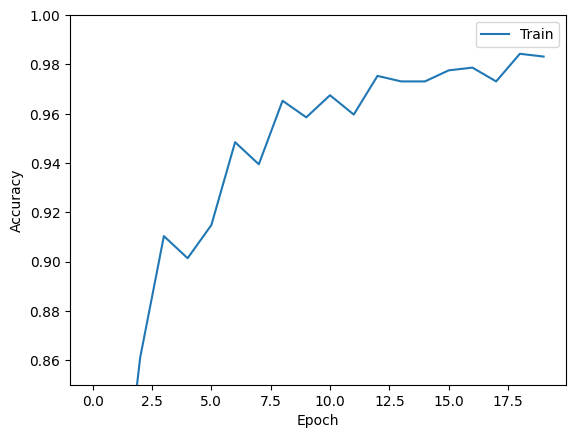

In [48]:
plt.plot(historyConv.history['accuracy'], label='Train')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim([0.85, 1])

In [49]:
model.evaluate(X_test, y_test, verbose=2)

10/10 - 0s - 8ms/step - accuracy: 0.9799 - loss: 0.0878


[0.08784741163253784, 0.9798657894134521]

In [50]:
probability_model = keras.Sequential([model, keras.layers.Softmax()])
probability_model(X_test[:5])

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[0.14884758, 0.14884758, 0.14884758, 0.40460962, 0.14884758],
       [0.14884758, 0.14884758, 0.14884758, 0.14884758, 0.40460962],
       [0.14884758, 0.14884758, 0.14884758, 0.40460962, 0.14884758],
       [0.1488482 , 0.1488482 , 0.1488482 , 0.14885063, 0.4046047 ],
       [0.14884758, 0.14884758, 0.14884758, 0.40460962, 0.14884758]],
      dtype=float32)>

In [51]:
import ipywidgets as widgets
label_names = ['Character (FORWARD)', 'Monster', 'Food', 'Item', 'Character (SIDE)']
index_slider = widgets.IntSlider(value=0, min=0, max=len(X_test)-1, description='Image index:')
def show_image(index):
    plt.imshow(X_test[index])
    plt.show()
    prediction = probability_model(X_test[index:index+1]).numpy()
    print(f'Predicted label: {np.argmax(prediction)} ({label_names[np.argmax(prediction)]})')
    print(f'Actual label: {np.argmax(y_test[index])} ({label_names[np.argmax(y_test[index])]})')
    print('Predicted probabilities:')
    print(f'    Character (FORWARD): {'%.2f' % (prediction[0][0] * 100)}%')
    print(f'    Monster:             {'%.2f' % (prediction[0][1] * 100)}%')
    print(f'    Food:                {'%.2f' % (prediction[0][2] * 100)}%')
    print(f'    Item:                {'%.2f' % (prediction[0][3] * 100)}%')
    print(f'    Character (SIDE):    {'%.2f' % (prediction[0][4] * 100)}%')
widgets.interactive(show_image, index=index_slider)

interactive(children=(IntSlider(value=0, description='Image index:', max=297), Output()), _dom_classes=('widge…

In [52]:
from time import time
def create_model(optimizer="adam"):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(49, (3, 3), strides=(2,2), activation='relu', input_shape=(16,16,3)))
    model.add(keras.layers.Flatten(input_shape=(16, 16, 3)))
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(5, activation='softmax'))
   
    model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=["accuracy"])
    return model

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")

X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

'''
param_grid = {
    'epochs' : [50, 100, 150],
    'batch_size' : [32, 50, 100],
    'optimizer' : ['Adam', 'Adadelta', 'SGD']
}

model_cv = KerasClassifier(build_fn=create_model, verbose=1)

random_search = RandomizedSearchCV(
    model_cv, param_distributions=param_grid, n_iter=15
)

random_model = random_search.fit(X,y)

start = time()
print(
    "RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
    % ((time() - start), 15)
)
report(random_search.cv_results_)
'''


param_grid = {
    'epochs' : [50, 100, 150],
    'batch_size' : [32, 50, 100],
    'optimizer' : ['Adam', 'Adadelta', 'SGD']
}

model_cv = KerasClassifier(build_fn=create_model, verbose=1)

grid = GridSearchCV(estimator=model_cv,  
                    n_jobs=-1, 
                    verbose=1,
                    cv=5,
                    param_grid=param_grid)

grid_cv_model = grid.fit(X_cv, y_cv,)

y_pred = grid_cv_model.predict(X_test)


print("Accuracy: ", np.mean(y_test == y_pred))

means = grid_cv_model.cv_results_['mean_test_score'] # Mean of test scores
stds = grid_cv_model.cv_results_['std_test_score'] # standard deviations of test scores
params = grid_cv_model.cv_results_['params'] # parameters used
# to print all scores, standard deviations and parameters used

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Printing the Best Parameters as a Result of Grid Search Cross Validation on the Screen
print("Best: %f using %s" % (grid_cv_model.best_score_, grid_cv_model.best_params_))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Epoch 1/150


C:\Users\cjbea\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\cjbea\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
C:\Users\cjbea\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4980 - loss: 1.2774
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7095 - loss: 0.7261
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8717 - loss: 0.3980
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9437 - loss: 0.2397
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9463 - loss: 0.1720
Epoch 6/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9748 - loss: 0.1159
Epoch 7/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9731 - loss: 0.1016
Epoch 8/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9811 - loss: 0.0749
Epoch 9/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9912 - loss: 0.0517
Epoch 10/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9961 - loss: 0.0539
Epoch 11/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9992 - loss: 0.0341
Epoch 12/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9974 - lo

In [57]:
#cross val with grid cv

'''
random_cv_model = random_model.best_estimator_
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(random_cv_model, X_cv, np.argmax(y_test, axis=1), cv=kfold,scoring= 'accuracy')

'''
cv_model = grid_cv_model.best_estimator_

kfold = KFold(n_splits=5, shuffle=True)
#np.argmax(y_test, axis=1)
results = cross_val_score(cv_model, X,y, cv=kfold,scoring= 'accuracy')

Epoch 1/150


C:\Users\cjbea\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\cjbea\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
C:\Users\cjbea\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4566 - loss: 1.3911
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6442 - loss: 0.9572
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8091 - loss: 0.6066
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9013 - loss: 0.3689
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9322 - loss: 0.2696
Epoch 6/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9715 - loss: 0.1506
Epoch 7/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9757 - loss: 0.1359
Epoch 8/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9882 - loss: 0.0872
Epoch 9/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9794 - loss: 0.0932
Epoch 10/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9795 - loss: 0.0629
Epoch 11/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9925 - loss: 0.0529
Epoch 12/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9868 - lo

C:\Users\cjbea\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\cjbea\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
C:\Users\cjbea\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5212 - loss: 1.2950
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7380 - loss: 0.7113
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9281 - loss: 0.3210
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9532 - loss: 0.2030
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9284 - loss: 0.1800
Epoch 6/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9699 - loss: 0.1183
Epoch 7/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9510 - loss: 0.1133
Epoch 8/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9853 - loss: 0.0821
Epoch 9/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9802 - loss: 0.0653
Epoch 10/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9882 - loss: 0.0474
Epoch 11/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9903 - loss: 0.0460
Epoch 12/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9967 - l

C:\Users\cjbea\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\cjbea\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
C:\Users\cjbea\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4828 - loss: 1.2977
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7050 - loss: 0.7325
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9110 - loss: 0.4283
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9186 - loss: 0.2778
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9388 - loss: 0.2091 
Epoch 6/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9634 - loss: 0.1258
Epoch 7/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9847 - loss: 0.0977
Epoch 8/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9851 - loss: 0.1085
Epoch 9/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9878 - loss: 0.0607
Epoch 10/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9970 - loss: 0.0545
Epoch 11/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9985 - loss: 0.0374
Epoch 12/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9857 - l

C:\Users\cjbea\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\cjbea\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
C:\Users\cjbea\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5255 - loss: 1.2663
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7305 - loss: 0.7121
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8754 - loss: 0.4097
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9202 - loss: 0.2127
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9467 - loss: 0.1636
Epoch 6/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9782 - loss: 0.1048
Epoch 7/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9804 - loss: 0.0735
Epoch 8/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9904 - loss: 0.0658
Epoch 9/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9906 - loss: 0.0510
Epoch 10/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9861 - loss: 0.0558
Epoch 11/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0214
Epoch 12/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9963 - lo

C:\Users\cjbea\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\cjbea\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
C:\Users\cjbea\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4772 - loss: 1.2965
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6678 - loss: 0.8122
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8699 - loss: 0.4424
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9230 - loss: 0.2807 
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9711 - loss: 0.1568 
Epoch 6/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9731 - loss: 0.1066 
Epoch 7/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9902 - loss: 0.0913 
Epoch 8/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9930 - loss: 0.0722 
Epoch 9/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9925 - loss: 0.0544 
Epoch 10/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9920 - loss: 0.0456 
Epoch 11/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9963 - loss: 0.0303 
Epoch 12/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9

In [58]:
#print kfold results
print('K-fold Cross Validation Accuracy Results: ', results)
print('K-fold Cross Validation Accuracy Results Mean: ', results.mean())

K-fold Cross Validation Accuracy Results:  [0.96638655 0.99159664 0.99159664 1.         0.98319328]
K-fold Cross Validation Accuracy Results Mean:  0.9865546218487395


In [59]:
#evaluating acc of resNet50 model compaired to our model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

resNet50Model = tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(16, 16, 3),
    pooling=None,
    classes=5,
    classifier_activation='softmax'
)

for layer in resNet50Model.layers:
    layer.trainable=False
    
dnn_model = keras.models.Sequential()
dnn_model.add(resNet50Model)
dnn_model.add(keras.layers.Flatten())
dnn_model.add(keras.layers.Dense(512, activation='relu'))
dnn_model.add(keras.layers.Dense(5, activation='softmax'))

dnn_model.summary()
dnn_model.compile(optimizer=keras.optimizers.Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


resnetHistory = dnn_model.fit(X_train, validation_data = X_test, epochs = 20)

ValueError: Input size must be at least 32x32; Received: input_shape=(16, 16, 3)